In [88]:
#importing necessary libraries:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

import pandas_datareader as pdr

from datetime import datetime

In [89]:
#creating the list with tech companies names
tech_list = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

#setting date values (end - today, start - one year before today)
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

#reading data from 'yahoo.com' and putting it to the global variables AAPL, GOOG, AMZN and MSFT
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [90]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,239.321344,234.340198,236.531660,237.019446,3.159917e+07,235.752365
std,44.471538,43.221598,43.707783,44.060102,1.649126e+07,44.658212
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,203.380005,199.389999,201.020004,201.550003,2.115810e+07,199.910309
50%,221.369995,217.559998,220.000000,219.889999,2.655860e+07,218.712738
75%,271.000000,265.390015,267.480011,268.480011,3.490860e+07,267.844330
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [91]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-03-21 to 2020-03-20
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


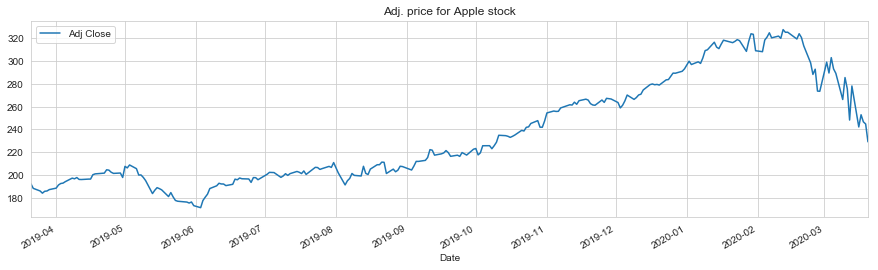

In [92]:
AAPL['Adj Close'].plot(figsize=(15,4), legend=True, title='Adj. price for Apple stock')

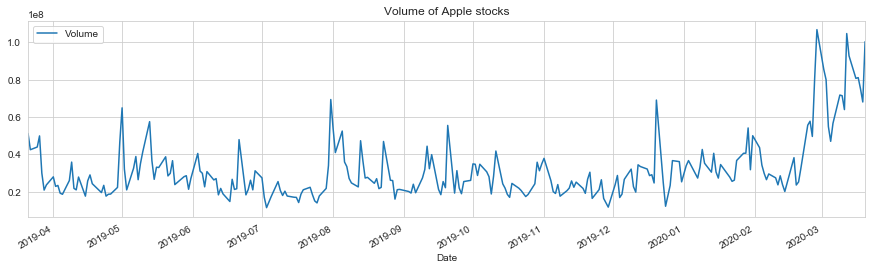

In [93]:
AAPL['Volume'].plot(figsize=(15,4), legend=True, title='Volume of Apple stocks')

In [94]:
#Calculating moving average using pandas metod .rolling(ma).mean()
#where ma - the quantity of days we want to take to account
ma_days = [10, 20, 50, 100]

for ma in ma_days:
    column_name = 'MA for %s days'%ma
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2019-03-21,196.330002,189.809998,190.020004,195.089996,51034200.0,192.569427,NaN,NaN,NaN,NaN
2019-03-22,197.690002,190.779999,195.339996,191.050003,42407700.0,188.581650,NaN,NaN,NaN,NaN
2019-03-25,191.979996,186.600006,191.509995,188.740005,43845300.0,186.301483,NaN,NaN,NaN,NaN
2019-03-26,192.880005,184.580002,191.660004,186.789993,49800500.0,184.376678,NaN,NaN,NaN,NaN
2019-03-27,189.759995,186.550003,188.750000,188.470001,29848400.0,186.034973,NaN,NaN,NaN,NaN


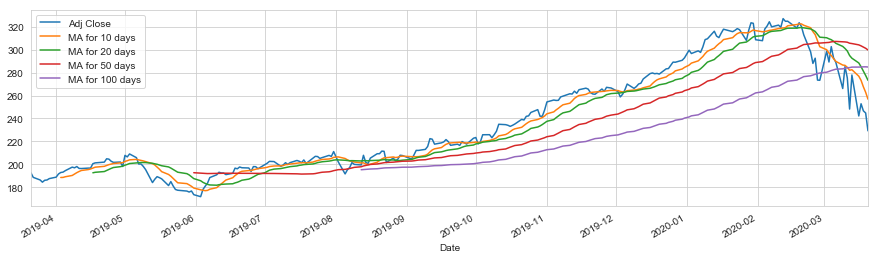

In [95]:
#plotting several types of moving average
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(figsize=(15,4), legend=True)

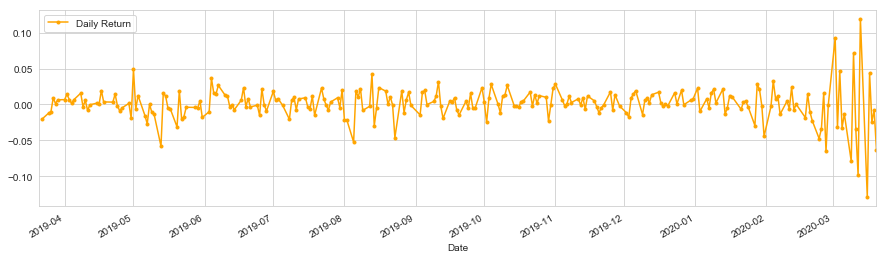

In [96]:
#Counting daily return using pandas method .pct_change() wich is usable for Series or DataFrames
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(15,4), color='orange', marker='.')

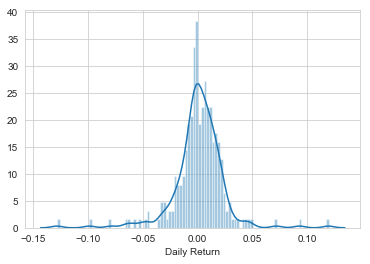

In [97]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

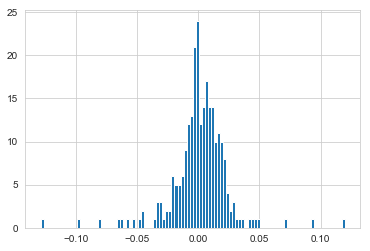

In [98]:
AAPL['Daily Return'].hist(bins=100)

In [99]:
#Now we want to see correlation between daily return of different stocks.
#Again creating dataframe of closing price:
close_df = pdr.DataReader(['AAPL','GOOG','AMZN','MSFT'], 'yahoo', start, end)['Adj Close']

In [100]:
close_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-03-21,192.569427,1819.260010,1231.540039,118.650192
2019-03-22,188.581650,1764.770020,1205.500000,115.521576
2019-03-25,186.301483,1774.260010,1193.000000,116.123627
2019-03-26,184.376678,1783.760010,1184.619995,116.370346
2019-03-27,186.034973,1765.699951,1173.020020,115.245224


In [101]:
#Counting daily return:
tech_daily_ret = close_df.pct_change()
tech_daily_ret.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-03-21,NaN,NaN,NaN,NaN
2019-03-22,-0.020708,-0.029952,-0.021144,-0.026368
2019-03-25,-0.012091,0.005377,-0.010369,0.005212
2019-03-26,-0.010332,0.005354,-0.007024,0.002125
2019-03-27,0.008994,-0.010125,-0.009792,-0.009668


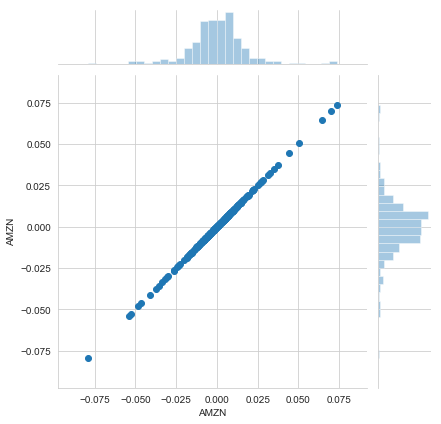

In [102]:
#Plotting correlation between 2 companies (in this case company and itself)
#and see that correlation is good as expected:
sns.jointplot('AMZN','AMZN',tech_daily_ret)

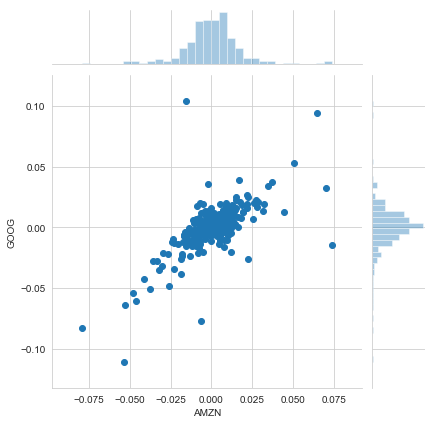

In [103]:
#correlation between Amazon and Google stocks is also good enough: 
sns.jointplot('AMZN','GOOG', tech_daily_ret)

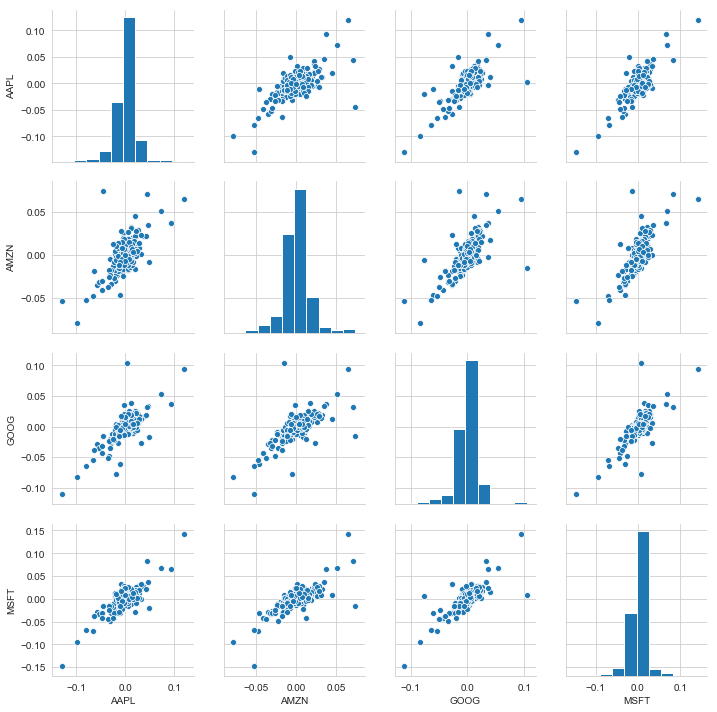

In [104]:
#Now plotting correlation between each pair of companies
#and see that in almost each case correlation is good as well:
sns.pairplot(tech_daily_ret.dropna())

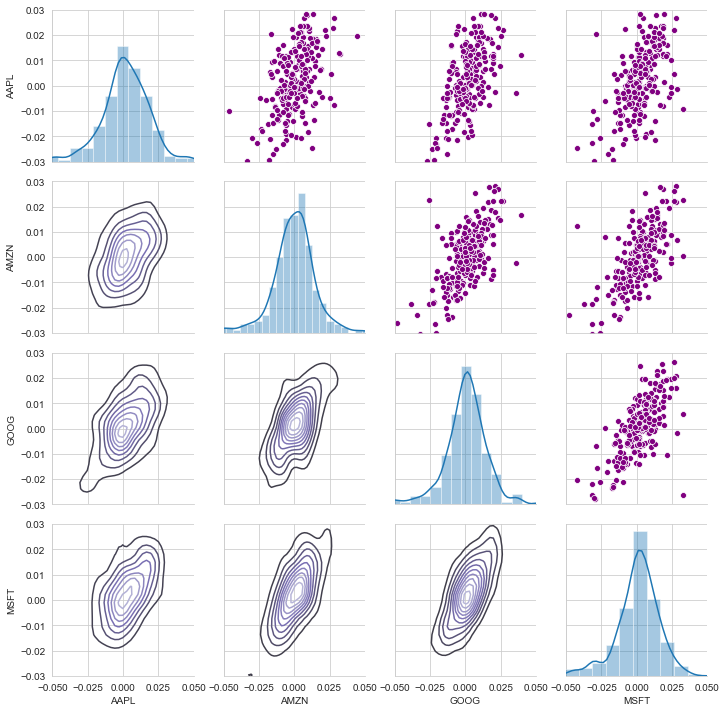

In [105]:
#using Seaborn library's capabilities to show different kinds of plots in one picture:
fig = sns.PairGrid(tech_daily_ret.dropna())


fig.map_upper(sns.scatterplot, color='Purple')
fig.axes[1,0].set_ylim(-0.03,0.03)
fig.axes[1,0].set_xlim(-0.05,0.05)
fig.axes[2,0].set_ylim(-0.03,0.03)
fig.axes[2,0].set_xlim(-0.05,0.05)
fig.axes[3,0].set_ylim(-0.03,0.03)
fig.axes[3,0].set_xlim(-0.05,0.05)
fig.axes[2,1].set_xlim(-0.05,0.05)
fig.axes[3,2].set_xlim(-0.05,0.05)
fig.axes[3,3].set_xlim(-0.05,0.05)
fig.axes[0,0].set_ylim(-0.03,0.03)


fig.map_lower(sns.kdeplot, cmap='Purples_d')


fig.map_diag(sns.distplot, bins=30)

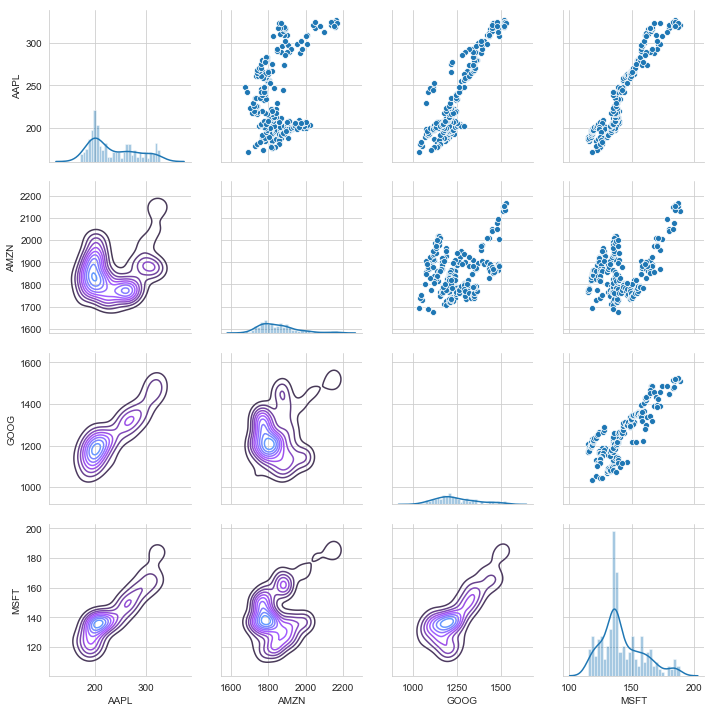

In [106]:
#the same for closing price:
fig2 = sns.PairGrid(close_df)

fig2.map_upper(sns.scatterplot)
fig2.map_lower(sns.kdeplot, cmap='cool_d')
fig2.map_diag(sns.distplot, bins=30)

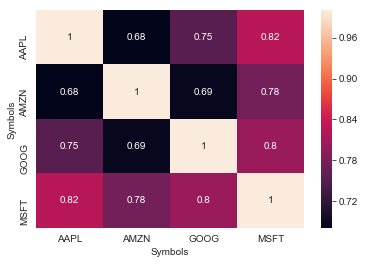

In [107]:
#Seaborn Heatmap to compare the correlation:
sns.heatmap(tech_daily_ret.dropna().corr(), annot=True)

Text(0, 0.5, 'Risk')

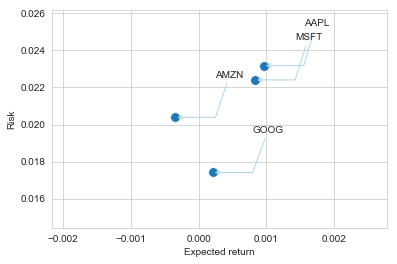

In [108]:
#Risk analysis.
#Using the basic way of risk analysis - comparing expected daily return and standart deviation of daily return.

rets = tech_daily_ret.dropna()

sns.scatterplot(rets.mean(), rets.std(), s=np.pi*30)

#Adding annotaions
for label, x, y in zip(tech_list, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (40,40), textcoords='offset points',
                 arrowprops = dict(arrowstyle='->', connectionstyle='arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0', 
                 color='lightblue'))

plt.xlabel('Expected return')
plt.ylabel('Risk')

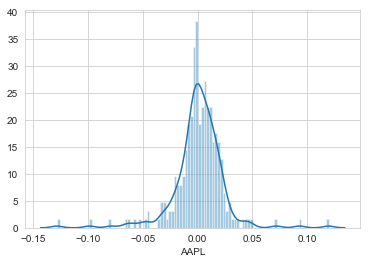

In [109]:
#Value a risk using quantile method
sns.distplot(rets['AAPL'].dropna(), bins=100)

In [110]:
#The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.0320642533519105

In [111]:
#The 0.05 empirical quantile for daily return for Apple's stock is 3.15%. It means that with 95% probability
#the daily loss will not exceed 3.14%. For example, if we have a 1 dollar investment, we shouldn't lose 
#more than 3.14%*1000000=31490$ in a day.

In [112]:
#Using this method for other companies in tech_list:

#Google
rets['GOOG'].quantile(0.05)

-0.029696353041007453

In [113]:
#Amazon
rets['AMZN'].quantile(0.05)

-0.026359488362961238

In [114]:
#Microsoft
rets['MSFT'].quantile(0.05)

-0.031283815523280877

In [115]:
#According to these results, investing to Amazon will lead to the lowest risk.

In [116]:
#Method Monte Karlo

#Method Monte Karlo based on idea that stock prices time series follow the rules of geometric Brownian motion,
#which is technically known as a Markov process. This means that the stock price follows a random walk, and 
#past price information is already incorporated, and the next price movement is "conditionally independent"
#of past price movements.  

#This means that you can't perfectly predict the future based only on the previous price of stock.

#This is the formula of geometric Brownian motion:

#delta(S)/S = mu*delta(t) + sigma*eps*sqrt(delta(t))

#where S - is stock price, mu - is expected daily return, sigma - std of daily return,
#      eps - random value.

#Now we can multiply both sides of equation to S:

#delta(S) = S*(mu*delta(t) + sigma*eps*sqrt(delta(t)))

#Now we see that the change of stock price is the current price multiplied by two parts. First one - it's called 
#"drift" - is the average daily return multiplied by the change of time. Second one - "shock" - will randomly 
#push the stock price up or down. So for each time period the stock will "drift" and then experience a "shock".

#By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of 
#where we might expect the stock price to be.

In [117]:
#Let's check the Monte Karlo method on 1-year period of time for Microsoft stocks.

days = 365
dt = 1/days #this is delta(t)
mu = rets.mean()['MSFT']
sigma = rets.std()['MSFT']

In [118]:
#Creating a function that calculates stock price series for a given period of time:
def monte_karlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for t in range(1, days):
        drift[t] = mu*(1/days)
        shock[t] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[t] = price[t-1] + price[t-1]*(drift[t] + shock[t-1])
        
    return price

Text(0, 0.5, 'Price')

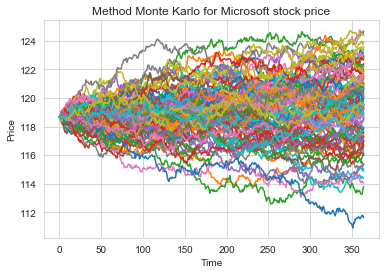

In [119]:
start_price = MSFT['Adj Close'][0]

for run in range(100):
    plt.plot(monte_karlo(start_price, days, mu, sigma))

plt.title('Method Monte Karlo for Microsoft stock price')
plt.xlabel('Time')
plt.ylabel('Price')

In [120]:
#Now let's increase the number of runs and get the histogram of end prices' distribution:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_karlo(start_price, days, mu, sigma)[days-1]
    
simulations

array([116.87051555, 119.23410819, 118.80620323, ..., 120.16047593,
       117.57804526, 118.98612383])

(array([  1.,   1.,   1.,   1.,   2.,   1.,   2.,   6.,   0.,   7.,   9.,
         10.,  12.,  11.,  18.,  28.,  18.,  26.,  34.,  41.,  38.,  56.,
         69.,  76.,  72.,  80., 104.,  97., 109., 162., 151., 146., 196.,
        182., 227., 217., 238., 278., 279., 272., 270., 298., 312., 288.,
        309., 299., 279., 297., 280., 274., 277., 247., 261., 274., 253.,
        218., 221., 220., 191., 157., 162., 151., 131., 138., 131., 101.,
         81.,  84.,  80.,  57.,  50.,  49.,  38.,  45.,  30.,  22.,  27.,
         26.,  12.,  11.,  15.,  15.,   9.,   7.,   4.,   4.,   1.,   5.,
          3.,   1.,   0.,   2.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]), array([109.60609607, 109.80611061, 110.00612515, 110.2061397 ,
        110.40615424, 110.60616878, 110.80618332, 111.00619786,
        111.20621241, 111.40622695, 111.60624149, 111.80625603,
        112.00627057, 112.20628511, 112.40629966, 112.6063142 ,
        112.80632874, 113.00634328, 113.20635782, 113.40637237,

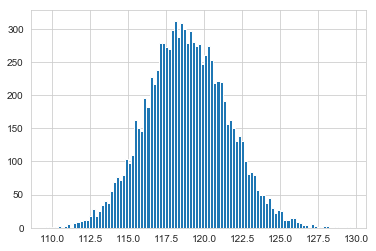

In [121]:
plt.hist(simulations, bins=100)

In [122]:
#defining 1% empirical quantile
q = np.percentile(simulations, 1)
q

112.72018236488971

Text(0.6, 0.6, 'VaR(0.99): $5.93')

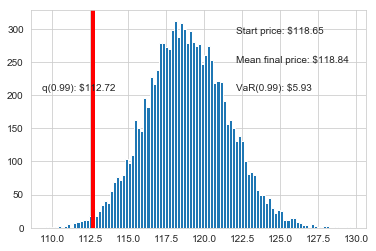

In [123]:
plt.hist(simulations, bins=100)
plt.axvline(x=q, linewidth=4, color='r')

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

In [124]:
#Now we have looked at the 1% empirical quantile of the final price distribution 
#to estimate the Value at Risk for the Microsoft stock, which looks to be $5.72 for 
#every investment of 118.65 (the price of one inital google stock).

#This basically menas for every initial stock you purchase your putting about $5.72
#at risk 99% of the time from our Monte Carlo Simulation.